#### What This Code Does:
1. Exploration: Highlights missing values and the distribution of key columns.
2. Cleaning: Drops rows with missing population codes if necessary.
3. Visualization: Plots the superpopulation code distribution.
4. Output: Saves the cleaned dataset to a new Excel file (cleaned_igsr_samples.xlsx).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = r"E:\Data Analytics\Genome Sample\igsr_samples.xlsx"
df = pd.read_excel(file_path)

In [7]:
#Clean and standardise columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [21]:
df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9
0,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
1,HG00098,male,SAME123272,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes phase 3 re..."
2,HG00101,male,SAME125153,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,HG00459,male,SAME125269,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
4,HG00473,female,SAME123338,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [23]:
#Convert relevant columns to categorical
categorical_columns = ['column_2', 'column_4', 'column_6']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [25]:
#
columns_to_check = ['column_3', 'column_4', 'column_6', 'column_9']
missing_data_summary = df[columns_to_check].isnull().sum()
total_rows = len(df)
missing_data_percentage = (missing_data_summary/total_rows) * 100

In [29]:
# Check for missing data in specific columns
print('Missing Data Summary for Selected Columns:')
missing_summary_df = pd.DataFrame({
    'Missing Count': missing_data_summary,
    'Missing Percentage (%)': missing_data_percentage.round(2)
})
print(missing_summary_df)

Missing Data Summary for Selected Columns:
          Missing Count  Missing Percentage (%)
column_3           1234                   24.78
column_4           1067                   21.43
column_6           1070                   21.49
column_9             98                    1.97


In [31]:
df_cleaned = df.dropna(subset=['column_4', 'column_6'])

In [39]:
def summarise_with_percentage(column):
    counts = df_cleaned[column].value_counts()
    percentages = (counts/len(df_cleaned)) * 100
    return pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})


In [41]:
print('\nSex Distribution')
print(summarise_with_percentage('column_2'))


Sex Distribution
          Count  Percentage (%)
column_2                       
female     1963           50.22
male       1945           49.76
Sex           1            0.03


In [45]:
print('\nPopulation Code Distribution (Top 10):')
print(summarise_with_percentage('column_4').head(10))


Population Code Distribution (Top 10):
          Count  Percentage (%)
column_4                       
GWD         280            7.16
YRI         187            4.78
CEU         184            4.71
ESN         173            4.43
CHS         171            4.37
IBS         161            4.12
PJL         158            4.04
PUR         150            3.84
CLM         148            3.79
BEB         144            3.68


In [47]:
print('\nSuperpopulation Code Distribution:')
print(summarise_with_percentage('column_6'))


Superpopulation Code Distribution:
                      Count  Percentage (%)
column_6                                   
AFR                    1421           36.35
EUR                     669           17.11
SAS                     661           16.91
EAS                     621           15.89
AMR                     535           13.69
EUR,AFR                   1            0.03
Superpopulation code      1            0.03


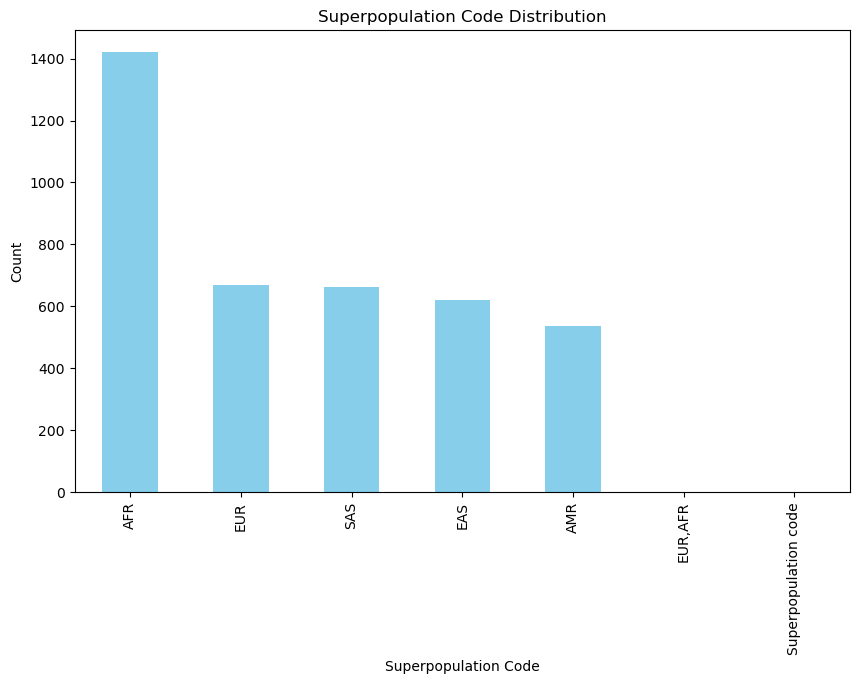

In [53]:
plt.figure(figsize=(10,6))
superpop_summary = summarise_with_percentage('column_6')
superpop_summary['Count'].plot(kind='bar', color='skyblue')
plt.title('Superpopulation Code Distribution')
plt.xlabel('Superpopulation Code')
plt.ylabel('Count')
plt.show()

In [55]:
cleaned_file_path = 'cleaned_genome_sample.xlsx'
df_cleaned.to_excel(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to cleaned_genome_sample.xlsx
